In [444]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [445]:
data = pd.read_csv("Desktop/DataMining (IN3011)/Project/HR_data.csv")

In [446]:
data.rename(columns={'number_project':'projects'}, inplace = True)
data.rename(columns={'average_montly_hours':'avg_monthly_hours'}, inplace = True)
data.rename(columns={'time_spend_company':'time_spent_at_company'}, inplace = True)
data.rename(columns={'Work_accident':'work_accident'}, inplace = True)
data.rename(columns={'sales':'department'}, inplace = True)

In [447]:
cols = data.columns.tolist()
cols.insert(10, cols.pop(cols.index('left')))
data = data.reindex(columns= cols)

In [448]:
data.head(n=6)

,satisfaction_level,last_evaluation,projects,avg_monthly_hours,time_spent_at_company,work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
5,0.41,0.50,2,153,3,0,0,sales,low,1


QQ-plots

Kolmogorov-Smirnov

In [457]:
st.kstest(data.satisfaction_level, 'norm')

KstestResult(statistic=0.53585639258517215, pvalue=0.0)

In [9]:
st.kstest(data.last_evaluation, 'norm')

KstestResult(statistic=0.6439761351357749, pvalue=0.0)

In [11]:
st.kstest(data.avg_monthly_hours, 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Jarque-Bera

In [8]:
st.jarque_bera(data.satisfaction_level)

(848.55788707221791, 0.0)

In [13]:
st.jarque_bera(data.last_evaluation) # this as well

(961.20022987139532, 0.0)

In [14]:
st.jarque_bera(data.avg_monthly_hours)

(812.07038927330223, 0.0)

In [ ]:
low_half_eval = data[data.last_evaluation<=0.7]

In [126]:
print (len(low_half_eval))

7197


In [127]:
high_half_eval = data[data.last_evaluation>0.7]

In [128]:
print (len(high_half_eval))

7802


In [129]:
print (st.kstest(low_half_eval.avg_monthly_hours, 'norm')) # these 2
print (st.kstest(high_half_eval.avg_monthly_hours, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


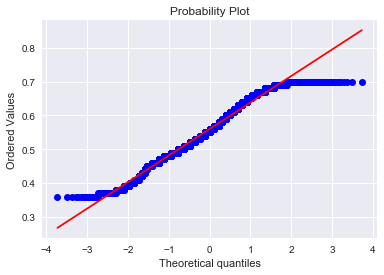

In [140]:
st.probplot(low_half_eval.last_evaluation, plot = plt);

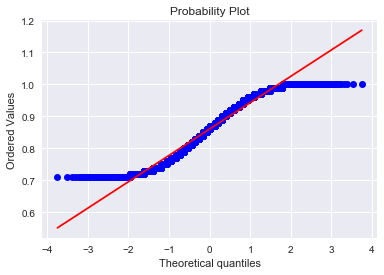

In [141]:
st.probplot(high_half_eval.last_evaluation, plot = plt);

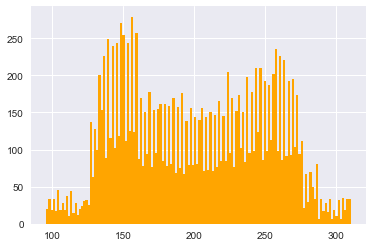

In [79]:
plt.hist(data.avg_monthly_hours, bins = 140, color = 'orange');

In [102]:
low_half = data[data.avg_monthly_hours<=200]
high_half = data[data.avg_monthly_hours>200]

In [103]:
print (len(low_half))
print (len(high_half))

7524
7475


In [104]:
print (st.shapiro(low_half.avg_monthly_hours))
print (st.shapiro(high_half.avg_monthly_hours))

(0.980006992816925, 3.198931551610232e-31)
(0.9802083969116211, 5.350604371524861e-31)


In [110]:
print (st.kstest(low_half.avg_monthly_hours, 'norm'))
print (st.kstest(high_half.avg_monthly_hours, 'norm'))

KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)


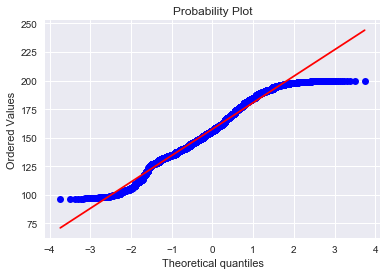

In [142]:
st.probplot(low_half.avg_monthly_hours, plot = plt);

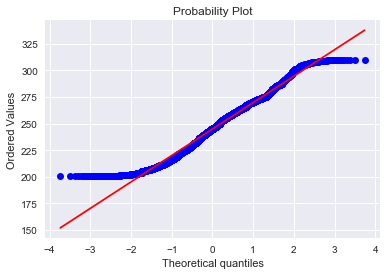

In [143]:
st.probplot(high_half.avg_monthly_hours, plot = plt);

Chi-square

Management

In [296]:
data.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [297]:
global_counts = pd.DataFrame(data.salary.value_counts())
global_counts

,salary
low,7316
medium,6446
high,1237


In [298]:
managers = data[data.department == 'management']

In [299]:
manager_counts = pd.DataFrame(managers.salary.value_counts())
manager_counts

,salary
high,225
medium,225
low,180


In [300]:
global_ratios = global_counts / len(data)
global_ratios

,salary
low,0.487766
medium,0.429762
high,0.082472


In [301]:
manager_ratios = pd.DataFrame(managers.salary.value_counts()) / len(managers)
manager_ratios

,salary
high,0.357143
medium,0.357143
low,0.285714


In [302]:
exs = global_ratios * len(managers) #expected counts
obs = manager_counts #observed

In [303]:
obs

,salary
high,225
medium,225
low,180


In [304]:
exs

,salary
low,307.292486
medium,270.750050
high,51.957464


Degrees of freedom = number of variable categories - 1
=2

Expected frequency counts

In [272]:
exs

,salary
low,307.292486
medium,270.750050
high,51.957464


Test statistic

- 345.31

P-value associated with the test statistic

- 1.03813227e-75

In [305]:
st.chisquare(f_obs = obs, f_exp = exs) # for management

Power_divergenceResult(statistic=array([ 345.31291753]), pvalue=array([  1.03813227e-75]))

HR

In [306]:
hr = data[data.department == 'hr']

In [307]:
hr_counts = pd.DataFrame(hr.salary.value_counts())
hr_counts

,salary
medium,359
low,335
high,45


In [308]:
hr_ratios = pd.DataFrame(hr.salary.value_counts()) / len(hr)
hr_ratios

,salary
medium,0.485792
low,0.453315
high,0.060893


In [309]:
exs1 = global_ratios * len(hr) #expected counts
obs1 = hr_counts #observed

In [310]:
obs1

,salary
medium,359
low,335
high,45


In [311]:
exs1

,salary
low,360.458964
medium,317.594106
high,60.946930


In [312]:
st.chisquare(f_obs = obs1, f_exp = exs1)# for hr

Power_divergenceResult(statistic=array([ 5.13240085]), pvalue=array([ 0.0768269]))

Accounting

In [313]:
accounting = data[data.department == 'accounting']

In [314]:
accounting_counts = pd.DataFrame(accounting.salary.value_counts())
accounting_counts

,salary
low,358
medium,335
high,74


In [315]:
accounting_ratios = pd.DataFrame(accounting.salary.value_counts()) / len(hr)
accounting_ratios

,salary
low,0.484438
medium,0.453315
high,0.100135


In [316]:
exs2 = global_ratios * len(accounting) #expected counts
obs2 = accounting_counts #observed

In [317]:
obs2

,salary
low,358
medium,335
high,74


In [318]:
exs2

,salary
low,374.116408
medium,329.627442
high,63.256150


In [319]:
st.chisquare(f_obs = obs2, f_exp = exs2)# for accounting

Power_divergenceResult(statistic=array([ 2.60664642]), pvalue=array([ 0.27162762]))

R&D

In [320]:
rd = data[data.department == 'RandD']

In [321]:
rd_counts = pd.DataFrame(rd.salary.value_counts())
rd_counts

,salary
medium,372
low,364
high,51


In [322]:
rd_ratios = pd.DataFrame(rd.salary.value_counts()) / len(rd)
rd_ratios

,salary
medium,0.472681
low,0.462516
high,0.064803


In [327]:
exs3 = global_ratios * len(rd) #expected counts
obs3 = rd_counts #observed

In [328]:
obs3

,salary
medium,372
low,364
high,51


In [329]:
exs3

,salary
low,383.871725
medium,338.222682
high,64.905594


In [330]:
st.chisquare(f_obs = obs3, f_exp = exs3) # R&D

Power_divergenceResult(statistic=array([ 5.31092337]), pvalue=array([ 0.07026639]))

Marketing

In [335]:
marketing = data[data.department == 'marketing']
marketing_counts = pd.DataFrame(marketing.salary.value_counts())
print (marketing_counts)
marketing_ratios = pd.DataFrame(marketing.salary.value_counts()) / len(marketing)
print (marketing_ratios)
exs4 = global_ratios * len(marketing) #expected counts
obs4 = marketing_counts #observed

        salary
low        402
medium     376
high        80
          salary
low     0.468531
medium  0.438228
high    0.093240


In [332]:
exs4

,salary
low,418.503100
medium,368.735782
high,70.761117


In [333]:
obs4

,salary
low,402
medium,376
high,80


In [334]:
st.chisquare(f_obs = obs4, f_exp = exs4) # marketing

Power_divergenceResult(statistic=array([ 2.00015393]), pvalue=array([ 0.36785113]))

In [336]:
product_mng = data[data.department == 'product_mng']
product_mng_counts = pd.DataFrame(product_mng.salary.value_counts())
print (product_mng_counts)
product_mng_ratios = pd.DataFrame(product_mng.salary.value_counts()) / len(product_mng)
print (product_mng_ratios)
exs5 = global_ratios * len(product_mng) #expected counts
obs5 = product_mng_counts #observed

        salary
low        451
medium     383
high        68
          salary
low     0.500000
medium  0.424612
high    0.075388


In [338]:
exs5

,salary
low,439.964798
medium,387.645310
high,74.389893


In [339]:
obs5

,salary
low,451
medium,383
high,68


In [337]:
st.chisquare(f_obs = obs5, f_exp = exs5) # product_mng

Power_divergenceResult(statistic=array([ 0.88132637]), pvalue=array([ 0.64360945]))

IT

In [341]:
IT = data[data.department == 'IT']
IT_counts = pd.DataFrame(IT.salary.value_counts())
print (IT_counts)
IT_ratios = pd.DataFrame(IT.salary.value_counts()) / len(IT)
print (IT_ratios)
exs6 = global_ratios * len(IT) #expected counts
obs6 = IT_counts #observed

        salary
low        609
medium     535
high        83
          salary
low     0.496333
medium  0.436023
high    0.067645


In [342]:
exs6

,salary
low,598.488699
medium,527.317955
high,101.193346


In [343]:
obs6

,salary
low,609
medium,535
high,83


In [344]:
st.chisquare(f_obs = obs6, f_exp = exs6) # IT

Power_divergenceResult(statistic=array([ 3.56746868]), pvalue=array([ 0.16800957]))

Support

In [345]:
support = data[data.department == 'support']
support_counts = pd.DataFrame(support.salary.value_counts())
print (support_counts)
support_ratios = pd.DataFrame(support.salary.value_counts()) / len(support)
print (support_ratios)
exs7 = global_ratios * len(support) #expected counts
obs7 = support_counts #observed

        salary
low       1146
medium     942
high       141
          salary
low     0.514132
medium  0.422611
high    0.063257


In [346]:
exs7

,salary
low,1087.230082
medium,957.939463
high,183.830455


In [347]:
obs7

,salary
low,1146
medium,942
high,141


In [348]:
st.chisquare(f_obs = obs7, f_exp = exs7) # support 

Power_divergenceResult(statistic=array([ 13.42103395]), pvalue=array([ 0.00121803]))

Technical

In [360]:
technical = data[data.department == 'technical']
technical_counts = pd.DataFrame(technical.salary.value_counts())
print (technical_counts)
technical_ratios = pd.DataFrame(technical.salary.value_counts()) / len(technical)
print (technical_ratios)
exs8 = global_ratios * len(technical) #expected counts
obs8 = technical_counts #observed

        salary
low       1372
medium    1147
high       201
          salary
low     0.504412
medium  0.421691
high    0.073897


In [361]:
exs8

,salary
low,1326.723115
medium,1168.952597
high,224.324288


In [362]:
obs8

,salary
low,1372
medium,1147
high,201


In [363]:
st.chisquare(f_obs = obs8, f_exp = exs8) # technical 

Power_divergenceResult(statistic=array([ 4.38258173]), pvalue=array([ 0.11177237]))

Sales

In [364]:
sales = data[data.department == 'sales']
sales_counts = pd.DataFrame(sales.salary.value_counts())
print (sales_counts)
sales_ratios = pd.DataFrame(sales.salary.value_counts()) / len(sales)
print (sales_ratios)
exs9 = global_ratios * len(sales) #expected counts
obs9 = sales_counts #observed

        salary
low       2099
medium    1772
high       269
          salary
low     0.507005
medium  0.428019
high    0.064976


In [365]:
exs9

,salary
low,2019.350623
medium,1779.214614
high,341.434762


In [366]:
obs9

,salary
low,2099
medium,1772
high,269


In [368]:
st.chisquare(f_obs = obs9, f_exp = exs9) # sales

Power_divergenceResult(statistic=array([ 18.5377731]), pvalue=array([  9.43134686e-05]))

Kruskal-Wallis

In [413]:
rookies = data[data.time_spent_at_company<=3]
experienced = data[ (4 <= data.time_spent_at_company) & ( data.time_spent_at_company <= 6)]
veterans = data[data.time_spent_at_company>=7]

In [435]:
print (len(rookies))
print (len(experienced))
print (len(veterans))

9687
4748
564


In [436]:
st.kruskal(rookies, experienced, veterans)

KruskalResult(statistic=4437198.3737585163, pvalue=0.0)